In [1]:
# import sys
# sys.path.append('../')
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()

-----------------PSUB---------------------

Initial Conditions (config.py) :  {'reserve': 1000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 2000.0, 'alpha': [0.5], 'alpha_bar': [0.5], 'supply_0': 20, 'supply_1': 30, 'supply_free': 2000.0, 'attestations': 40, 'attestations_0': 20, 'attestations_1': 20, 'invariant_V': 4000.0, 'invariant_I': 2000.0, 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0   0                     0                     0             50   
1   1                     0                     0             50   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0               3               2                 45                  0.1   
1               3               2                 45                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  , 'chosen_agent': 0}
Params (config.py) :  {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised':

Negative attestation.
Negative attestation.
PRICE (ATTEST):  1.3482380928092907
Negative attestation.
Negative attestation.
Negative attestation.
Negative attestation.
Negative attestation.
Negative attestation.
Negative attestation.
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          1.057106e-09       94.49375   
1  1.0                   0.0          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0       2.338218e-07                  0.1   
1             3.0             2.0       4.500000e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  
----------------------------
Negative attestation.
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          1.057106e-09       94.49375   

   agent_supply_1  agent_supply_0  agent_supp

1                 20.0  Agent burns. Amt to burn =  3.348484763176413e-13

----------------------------
Negative attestation. | alpha =  0.6211686230898187 private_alpha =  0.1
PRICE (ATTEST):  1.118254768497108
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          8.452616e-10       94.49375   
1  1.0                   0.0          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0       2.998652e-13                  0.1   
1             3.0             2.0       4.500000e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  Negative attestation.

Negative attestation.
CHOSEN AGENT =  amt_neg =  1.6037072949825095e-13
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0                   0.0                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent

1                 20.0  PRICE (BOND/BURN):  0.0
 Time  3
PRICE pbar (from bondburn update) = 0.0
PRICE (ATTEST):  1.1182547666838947
 Time  3
Positive attestation
Positive attestation
r 50.0
r 94.49374987537283
Positive attestation
No trade. P =  1.1182547666553155 private_price =  20.0
Agent supply too low. No bond/burn | s_free =  -9.094947017729281e-13
Positive attestation. | alpha =  0.6211686238395566 private_alpha =  0.9
Positive attestation
Agent supply too low. Cannot attest
amt_Q1 =  0.051481125269929325
PRICE (ATTEST):  1.1182547659152782
r 50.0
r 94.49374993378035
No trade. P =  1.1182547666553155 private_price =  20.0
Agent burns. Amt to burn =  1.4090277974842965e-21
Positive attestation. | alpha =  0.6211686238395566 private_alpha =  0.9
Negative attestation. | alpha =  0.6211686236270749 private_alpha =  0.1
amt_neg =  7.913132363391937e-22
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0               0.00000          7.500667e-10       94.493

1                 20.0  PRICE (BOND/BURN):  1.1182547664455882

----------------------------
PRICE pbar (from bondburn update) = 0.0
CHOSEN AGENT =  Negative attestation. | alpha =  0.7188198519953426 private_alpha =  0.1
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          1.057106e-09       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -9.094947e-13                  0.1   

   agent_private_price  
0                  0.2  amt_neg =  1.8391207989671584e-13
 Time  5
CHOSEN AGENT =  r 50.0
r 94.49374987537283
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          7.500667e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0       3.054843e-13                  0.1   

   agent_private_price  
0                  0.2  No tra

amt_Q1 =  0.02647167073493574
PRICE (ATTEST):  1.3471729146408327
Agent supply too low. Cannot attest
r 50.0
PRICE (ATTEST):  1.1182547664455877
No trade. P =  1.1956451778898392 private_price =  20.0
Positive attestation
Positive attestation. | alpha =  0.700300319320647 private_alpha =  0.9
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          8.452616e-10       94.49375   
1  1.0              0.071022          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -2.273737e-13                  0.1   
1       17.549704             2.0       3.045030e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  amt_Q1 =  0.03294508849359988

PRICE (BOND/BURN):  1.195645177889839
----------------------------
PRICE pbar (from bondburn update) = 0.0
Positive attestation
CHOSEN AGENT =  r 50.0
    id  ag

1                 20.0  Positive attestation. | alpha =  0.7379450689454711 private_alpha =  0.9

amt_Q1 =  0.02158294271128133
----------------------------
Positive attestation
CHOSEN AGENT =  PRICE (ATTEST):  1.2821346372972275
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          8.452616e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -2.273737e-13                  0.1   

   agent_private_price  
0                  0.2  Positive attestation
 Time  7
Positive attestation
r 94.49374993378035
Positive attestation
Agent supply too low. No bond/burn | s_free =  -2.2737367544323206e-13
Positive attestation
Agent supply too low. Cannot attest
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          1.057106e-09       94.49375   
1  1.0              0.113199          0.000000e+00       50.00000   


Agent supply too low. Cannot attest
PRICE (ATTEST):  1.2040297705469474
Agent supply too low. Cannot attest
PRICE (BOND/BURN):  1.205044711432636
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0               0.00000          7.614842e-10       94.49375   
1  1.0               0.16849          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -2.273737e-12                  0.1   
1       37.507219             2.0       1.049278e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  PRICE pbar (from bondburn update) = 0.0

r 94.49374987537283
----------------------------
Agent supply too low. No bond/burn | s_free =  -1.3642420526593924e-12
CHOSEN AGENT =  Agent supply too low. Cannot attest
PRICE (ATTEST):  1.2050447114326353
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.

1                 20.0  
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.155225                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       34.779317             2.0          13.220683                  0.9   

   agent_private_price  
1                 20.0  ----------------------------
 Time  9
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          7.614842e-10       94.49375   
1  1.0              0.177998          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -2.273737e-12                  0.1   
1       39.452169             2.0       8.547831e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0   Time  11
r 50.0

No trade. P =  1.2050447114326353 private_pric

Agent supply too low. Cannot attest
Positive attestation. | alpha =  0.7440414398304883 private_alpha =  0.9
r 94.49374995688015
amt_Q1 =  0.012353445181645517
Positive attestation. | alpha =  0.7715144876942737 private_alpha =  0.9
Agent supply too low. No bond/burn | s_free =  -3.183231453150822e-12
PRICE (BOND/BURN):  1.2893038382250441
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.0
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          8.452616e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0       3.135577e-13                  0.1   

   agent_private_price  
0                  0.2  PRICE (BOND/BURN):  1.2726539600590654
amt_Q1 =  0.00716087917917762
r 50.0
 Time  11
PRICE (BOND/BURN):  1.2652922863289202
PRICE pbar (from bondburn update) = 0.0
No trade. P =  1.2893038382250441 private_price =  20.0
r 94.4937499337810

----------------------------
amt_Q1 =  0.010135436451153586
No trade. P =  1.243472869744137 private_price =  20.0
Positive attestation. | alpha =  0.7492041342390202 private_alpha =  0.9
CHOSEN AGENT =  PRICE (BOND/BURN):  1.2772171056602133
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.177998                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       39.452169             2.0           8.547831                  0.9   

   agent_private_price  
1                 20.0  PRICE pbar (from bondburn update) = 0.0
 Time  13
amt_Q1 =  0.023146272301547546
r 50.0
r 50.0
No trade. P =  1.2772171056602133 private_price =  20.0
No trade. P =  1.2726539600590645 private_price =  20.0
Positive attestation. | alpha =  0.7599038120773643 private_alpha =  0.9
Positive attestation
Positive attestation. | alpha =  0.7790417990828609 private_alpha =  0.9
amt_Q1 =  0.013922790706789406
amt_Q1 = 

1                 20.0  amt_Q1 =  0.006978234292654116

Positive attestation
----------------------------
PRICE (ATTEST):  1.2814447808667684
CHOSEN AGENT =  Positive attestation
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          7.614842e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -2.273737e-12                  0.1   

   agent_private_price  
0                  0.2   Time  14
Positive attestation
r 94.49374995688015
Positive attestation
Agent supply too low. No bond/burn | s_free =  -2.2737367513778936e-12
Agent supply too low. Cannot attest
Positive attestation
r 94.49374995688015
Agent supply too low. No bond/burn | s_free =  -2.2737367513778936e-12
Agent supply too low. Cannot attest
PRICE (BOND/BURN):  1.2851323875422866
PRICE pbar (from bondburn update) = 0.0
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  

1                 20.0  Positive attestation

Positive attestation
Positive attestation

----------------------------
Positive attestation
----------------------------
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.169516                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       37.708904             2.0          10.291096                  0.9   

   agent_private_price  
1                 20.0      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          7.500667e-10       94.49375   
1  1.0              0.182392          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -4.547473e-13                  0.1   
1       40.336292             2.0       7.663708e+00                  0.9   

   agent_private_price  
0       

CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          7.614842e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -1.591616e-12                  0.1   

   agent_private_price  
0                  0.2  Positive attestation. | alpha =  0.779649629864088 private_alpha =  0.9
 Time  17
amt_Q1 =  0.0076899869311587475
r 94.49374995688015
r 50.0
Agent supply too low. No bond/burn | s_free =  -1.5916157250481974e-12
CHOSEN AGENT =  Agent supply too low. Cannot attest
No trade. P =  1.273248415588655 private_price =  20.0
Agent supply too low. Cannot attest
Positive attestation. | alpha =  0.779649629864088 private_alpha =  0.9
r 94.49374995688015
amt_Q1 =  0.0053682141827277804
r 94.49374993378126
Agent supply too low. No bond/burn | s_free =  -1.5916157250481974e-12
PRICE (BOND/BURN):  1.2732484155886548
Agent supply too low. Cannot att

PRICE (ATTEST):  1.281755051566454
amt_Q0 =  0.0
Positive attestation
r 94.49374996002814
Agent supply too low. Cannot attest
Positive attestation
Agent burns. Amt to burn =  1.963623378598385e-13
Positive attestation
Negative attestation. | alpha =  0.7897666124817638 private_alpha =  0.1
Positive attestation
amt_neg =  1.2549304802301314e-13
PRICE (ATTEST):  1.2773461286042187
amt_Q0 =  0.0
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          8.452616e-10       94.49375   
1  1.0              0.182394          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -4.547473e-13                  0.1   
1       40.342778             2.0       7.657222e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  PRICE (BOND/BURN):  1.1579291524097108

PRICE pbar (from bondburn update) = 1.157929152409

1                 20.0  
PRICE (BOND/BURN):  1.1346286358843098
Positive attestation. | alpha =  0.7830729538536807 private_alpha =  0.9
PRICE pbar (from bondburn update) = 1.1346286358843098
amt_Q1 =  0.00507508027551528

r 94.4937499600286
r 50.0
----------------------------
Agent burns. Amt to burn =  9.094946946819292e-13
No trade. P =  1.276596409712375 private_price =  20.0
Negative attestation. | alpha =  0.7897666124817598 private_alpha =  0.1
amt_neg =  6.485092315287892e-13
Positive attestation. | alpha =  0.7830729538536807 private_alpha =  0.9
amt_Q0 =  0.0
amt_Q1 =  0.0044033912709591505
PRICE (ATTEST):  1.2831427751199806
PRICE (BOND/BURN):  1.276596409712375
Negative attestation.
PRICE pbar (from bondburn update) = 0.0
Negative attestation.
r 50.0
----------------------------
No trade. P =  1.276596409712375 private_price =  20.0
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          7.614842e-10       9

0                  0.2  PRICE (BOND/BURN):  1.282200651427916
 Time  21
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000              0.032925       94.49375   
1  1.0              0.189213              0.000000       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000        8.738653           3.261347                  0.1   
1       41.731333        2.000000           6.268667                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  PRICE pbar (from bondburn update) = 0.0
r 94.49374987537283
r 50.0

Agent burns. Amt to burn =  3.3508424703315534
No trade. P =  1.282200651427916 private_price =  20.0
Negative attestation. | alpha =  0.7349360493735604 private_alpha =  0.1
Positive attestation. | alpha =  0.7888032910067696 private_alpha =  0.9
amt_neg =  2.1801910945075607
----------------------------
amt_Q1 =  0.009807450958252794
amt_Q0 =

0                  0.2   Time  21
Agent burns. Amt to burn =  1.1187337152152528e-08
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          8.452616e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -1.591616e-12                  0.1   

   agent_private_price  
0                  0.2      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          7.614842e-10       94.49375   
1  1.0              0.210585          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -1.136868e-12                  0.1   
1       46.117826             2.0       1.188217e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  
Negative attestation. | alpha =  0.7391417967799772 priva

No trade. P =  1.2843195391565647 private_price =  20.0
Agent burns. Amt to burn =  1.1059358321141608e-08
Positive attestation. | alpha =  0.7909698537096971 private_alpha =  0.9
Negative attestation. | alpha =  0.7419937440441053 private_alpha =  0.1
amt_Q1 =  0.011481693335652162
amt_neg =  6.835082640503184e-09
PRICE (BOND/BURN):  1.2843195391565638
amt_Q0 =  3.3423796297893155e-11
PRICE pbar (from bondburn update) = 0.0
PRICE (BOND/BURN):  1.2452206539184347
r 50.0
PRICE pbar (from bondburn update) = 1.2452206539184347
r 98.29408047165077
No trade. P =  1.2843195391565638 private_price =  20.0
Agent supply too low. No bond/burn | s_free =  -9.09384108188251e-13
Positive attestation. | alpha =  0.7909698537096971 private_alpha =  0.9
Agent supply too low. Cannot attest
amt_Q1 =  0.010354398569123638
PRICE (ATTEST):  1.236307843379423
Positive attestation
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.220448                

0                  0.2  ----------------------------
 Time  25
Positive attestation
CHOSEN AGENT =  r 94.49374995688015
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.194785                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       42.872854             2.0           5.127146                  0.9   

   agent_private_price  
1                 20.0  Agent supply too low. No bond/burn | s_free =  -1.1368683741617333e-12
Positive attestation
 Time  25
Agent supply too low. Cannot attest
r 50.0
r 94.49374995688015
No trade. P =  1.2335166657189138 private_price =  20.0
Agent supply too low. No bond/burn | s_free =  -1.1368683741617333e-12
Positive attestation. | alpha =  0.7428391838307953 private_alpha =  0.9
Agent supply too low. Cannot attest
amt_Q1 =  0.004464440668723213
PRICE (BOND/BURN):  1.3037985519468256
r 50.0
PRICE pbar (from bondburn update) = -0.0
No trade. P =  1.2

1                 20.0      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0               0.22294                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       48.636644             2.0           9.363356                  0.9   

   agent_private_price  
1                 20.0  
----------------------------
 Time  26
Negative attestation. | alpha =  0.7428391838307953 private_alpha =  0.1
amt_neg =  2.7570104647150492e-17
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0               0.00000          7.614842e-10       94.49375   
1  1.0               0.23399          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -1.591616e-12                  0.1   
1       50.905083             2.0       7.094917e+00                  0.9   

   agent_private_price  
0                  0.


r 94.49374995688015
----------------------------
Agent supply too low. No bond/burn | s_free =  -2.5011104268211256e-12
CHOSEN AGENT =  
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0              0.032925       98.29408   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0        8.738653       3.921256e-17                  0.1   

   agent_private_price  
0                  0.2  ----------------------------
 Time  26
CHOSEN AGENT =  Agent supply too low. Cannot attest
CHOSEN AGENT =  r 98.29408047165077
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          8.452616e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -2.273737e-13                  0.1   

   agent_private_price  
0                  0.2  Agent burns. Amt to burn =  3.9212558923962086e-1

amt_neg =  7.875014040477288e-26
amt_neg =  1.6506859930840905e-13
amt_Q0 =  0.0
PRICE (BOND/BURN):  1.2371267769661203
PRICE (BOND/BURN):  0.0
amt_Q0 =  0.0
PRICE pbar (from bondburn update) = 0.0
PRICE (BOND/BURN):  1.029770639755913
r 98.29408047165077
PRICE pbar (from bondburn update) = 1.029770639755913
r 94.49374993378149
Agent burns. Amt to burn =  9.094946948859843e-13
Negative attestation. | alpha =  0.8076570049058142 private_alpha =  0.1
No trade. P =  0.0 private_price =  0.2
amt_neg =  6.375448613823424e-13
amt_Q0 =  0.0
PRICE (ATTEST):  1.3006394914279822
Negative attestation. | alpha =  0.7474623357778156 private_alpha =  0.1
Negative attestation.
Negative attestation.
amt_neg =  6.649015144404618e-34
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0               0.00000          7.614842e-10       94.49375   
1  1.0               0.23399          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_privat

Agent supply too low. No bond/burn | s_free =  -1.8189894004914295e-12
PRICE (ATTEST):  1.237126776966121
CHOSEN AGENT =  No trade. P =  0.0 private_price =  0.2
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          8.452616e-10       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -6.821210e-13                  0.1   

   agent_private_price  
0                  0.2  Agent supply too low. Cannot attest
 Time  30
Negative attestation. | alpha =  0.7474623357778156 private_alpha =  0.1
r 94.49374995688015
r 94.49374993378171
amt_neg =  2.969944372203265e-13
Agent supply too low. No bond/burn | s_free =  -6.821210236101977e-13
amt_Q0 =  0.0
Agent supply too low. Cannot attest
PRICE (ATTEST):  1.24164758357614
r 94.49374993378171
Negative attestation.
Agent supply too low. No bond/burn | s_free =  -1.8189894004914295e-12
Agent supply too low. No bond/burn |

1                 20.0  Agent supply too low. Cannot attest

PRICE (ATTEST):  1.3006394914279793
----------------------------
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0               0.00000          7.614842e-10       94.49375   
1  1.0               0.23399          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -1.136868e-12                  0.1   
1       50.905083             2.0       7.094917e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.202711                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       44.493919             2.0           3.506081                  0.9   

   agent_private_price  
1                 20.0  C

PRICE pbar (from bondburn update) = 0.0
Agent supply too low. Cannot attest
r 98.39130792595859
PRICE (BOND/BURN):  1.3006852203100936
Agent supply too low. No bond/burn | s_free =  -3.637978807091199e-12
Agent supply too low. Cannot attest
PRICE pbar (from bondburn update) = 0.0
PRICE (ATTEST):  1.2413807647500779
r 94.49374995688015
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0              0.032925       98.29408   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0        8.738653       1.715472e-13                  0.1   

   agent_private_price  
0                  0.2      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          8.452616e-10       94.49375   
1  1.0              0.234809          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000  

0                  0.2  Negative attestation. | alpha =  0.7474623357778093 private_alpha =  0.1
 Time  34
amt_neg =  1.1420086509646852e-13
r 94.49374993378171
amt_Q0 =  0.0
PRICE (BOND/BURN):  0.0
Agent supply too low. No bond/burn | s_free =  -1.1368683744966619e-12
PRICE pbar (from bondburn update) = 0.0
r 98.29408047165077
Agent supply too low. Cannot attest
No trade. P =  0.0 private_price =  0.2
r 94.49374993378171
Negative attestation. | alpha =  0.7474623357778093 private_alpha =  0.1
Agent supply too low. No bond/burn | s_free =  -1.1368683744966619e-12
amt_neg =  5.330239040991721e-13
Agent supply too low. Cannot attest
amt_Q0 =  0.0
PRICE (BOND/BURN):  1.3068242648508064
PRICE (ATTEST):  1.2416475835761325
PRICE pbar (from bondburn update) = 0.0
Negative attestation.
r 94.49374993378171
Negative attestation.
Agent supply too low. No bond/burn | s_free =  -2.2737367272373362e-13
Positive attestation
Positive attestation
    id  agent_attestations_1  agent_attestations_0  age

1                 20.0  r 50.0

No trade. P =  1.2426295083853767 private_price =  20.0
----------------------------
Positive attestation. | alpha =  0.7484749460994917 private_alpha =  0.9
CHOSEN AGENT =  amt_Q1 =  0.0029111055467379836
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000              0.032925       98.29408   
1  1.0              0.204467              0.000000       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000        8.738653       3.975957e-13                  0.1   
1       44.849263        2.000000       3.150737e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.239613                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       52.055246             2.

1                 20.0      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000              0.032925       98.29408   
1  1.0              0.208072              0.000000       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000        8.738653       3.975957e-13                  0.1   
1       45.586537        2.000000       2.413463e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  

----------------------------
r 94.49374995688038
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000              0.032488      98.391308   
1  1.0              0.209665              0.000000      50.000000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000        8.649158      -3.183231e-12                  0.1   
1       45.916134        2.000000       2.083866e

No trade. P =  1.304947267753616 private_price =  20.0
amt_neg =  2.526064300614804e-13
Positive attestation. | alpha =  0.8120617061984012 private_alpha =  0.9
PRICE pbar (from bondburn update) = 2.5956220588717764
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0              0.032488      98.391308   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0        8.649158      -2.728484e-12                  0.1   

   agent_private_price  
0                  0.2  amt_Q0 =  0.0
amt_Q1 =  0.0039539398338411975
r 94.49374995688083
r 98.29408047165123
PRICE (BOND/BURN):  1.3049472677536158
 Time  39
Agent burns. Amt to burn =  3.975957054748721e-13
Agent burns. Amt to burn =  9.999999900000908
PRICE pbar (from bondburn update) = -0.0
Negative attestation. | alpha =  0.7493845595254418 private_alpha =  0.1
Negative attestation. | alpha =  0.8133056896949213 private_alpha =  0.1
r 50.0
amt_neg =  2.664

0                  0.2   Time  51
r 50.0
Agent supply too low. Cannot attest
 Time  54
No trade. P =  1.205099021590189 private_price =  20.0
r 99.48113790588798
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000              0.031551      99.114793   
1  1.0              0.258292              0.000000      50.000000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000        8.457349      -1.364242e-12                  0.1   
1       55.875877        2.000000       2.124123e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  PRICE (ATTEST):  1.211267277391087
Positive attestation. | alpha =  0.7099751751722313 private_alpha =  0.9
Agent supply too low. No bond/burn | s_free =  -4.547473508859657e-13
amt_Q1 =  0.00034697215568624794
Agent supply too low. Cannot attest
r 50.0
r 99.48113790588798
No trade. P =  1.205099021590189 private_price =  

amt_Q1 =  0.0004434597736128098
amt_neg =  1.040138337704875e-13
Positive attestation
PRICE (ATTEST):  1.2059257875450233
Positive attestation
amt_Q0 =  0.0

Positive attestation
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0               0.21817                   0.0           50.0   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1        47.65527             2.0            0.34473                  0.9   

   agent_private_price  
1                 20.0  ----------------------------
PRICE (BOND/BURN):  0.0
Positive attestation
Positive attestation
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0              0.031551      99.114793   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0        8.457349      -1.364242e-12                  0.1   

   agent_private_price  
0                  0.2   Time  5

1                 20.0  amt_Q0 =  0.0

amt_Q1 =  0.0015017365071302172
PRICE (ATTEST):  1.2705573820896308
Negative attestation.
----------------------------
PRICE (BOND/BURN):  1.269333670422137
r 102.78740802511845
PRICE pbar (from bondburn update) = -0.0
CHOSEN AGENT =  Negative attestation.
r 50.0
Agent supply too low. No bond/burn | s_free =  -9.094947000142958e-13
No trade. P =  1.269333670422137 private_price =  20.0
Agent supply too low. Cannot attest
Positive attestation. | alpha =  0.7755846845295067 private_alpha =  0.9
r 102.78740802511845
Agent supply too low. No bond/burn | s_free =  -9.094947000142958e-13
amt_Q1 =  0.0009949183567455595
Agent supply too low. Cannot attest
PRICE (BOND/BURN):  1.2112672773910835
Positive attestation
PRICE pbar (from bondburn update) = -0.0
PRICE (ATTEST):  1.2710129378847732
r 102.78740802511845
Agent supply too low. No bond/burn | s_free =  -1.36424205090076e-12
Positive attestation
Agent supply too low. Cannot attest
Positive attestation

1                 20.0  Positive attestation
CHOSEN AGENT =   Time  55
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0              0.030216      99.481138   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0        8.183787       1.485289e-13                  0.1   

   agent_private_price  
0                  0.2  r 50.0
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000              0.031551      99.114793   
1  1.0              0.260905              0.000000      50.000000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000        8.457349       1.946166e-13                  0.1   
1       56.410393        2.000000       1.589607e+00                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  Positive attestation
 Time  58
Positive attestation
No trade. P =

Negative attestation.
r 102.78740802511845
Negative attestation.
Agent supply too low. No bond/burn | s_free =  -9.094947000142958e-13
Agent supply too low. Cannot attest
r 99.48113790588866
amt_Q1 =  9.831712264921559e-05
Agent burns. Amt to burn =  9.999999899999999
PRICE (BOND/BURN):  1.206268784891629
Negative attestation. | alpha =  0.7768287130138815 private_alpha =  0.1
r 102.78740802511845
PRICE pbar (from bondburn update) = 0.0
r 50.0
amt_neg =  7.194438473265325
amt_neg =  4.723322254479225e-22
Positive attestation. | alpha =  0.7386466212098072 private_alpha =  0.9
amt_Q0 =  0.0
amt_Q1 =  0.0004683036856323062
r 107.84324604106257
PRICE (BOND/BURN):  1.2333263540472044
Agent burns. Amt to burn =  8.094381265522647e-22
PRICE pbar (from bondburn update) = 0.0
Negative attestation. | alpha =  0.685212054196076 private_alpha =  0.1
r 50.0
amt_neg =  4.169583693467813e-22
No trade. P =  1.2333263540472044 private_price =  20.0
amt_Q0 =  0.0
Positive attestation. | alpha =  0.7386

    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0              0.064829      103.16026   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0       15.269333      -1.364242e-12                  0.1   

   agent_private_price  
0                  0.2  Positive attestation
 Time  79
PRICE (ATTEST):  1.1808681245152652
r 103.16026001257558
Positive attestation
Agent supply too low. No bond/burn | s_free =  -1.3642420526593924e-12
Positive attestation
Agent supply too low. Cannot attest
Positive attestation
r 103.16026001257558
Positive attestation
Agent supply too low. No bond/burn | s_free =  -1.3642420526593924e-12
Agent supply too low. Cannot attest
PRICE (BOND/BURN):  1.2334859833587482
PRICE pbar (from bondburn update) = -0.0
r 103.16026001257558
Agent burns. Amt to burn =  9.99999989999818
Negative attestation. | alpha =  0.738810379386693 private_alpha =  0.1
amt_neg =  6.273248501829185
amt

/Users/shrutiappiah/Documents/Github/ICF_Internal/src/sim/run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]


In [1]:
from src.sim import run
experiments = run.run()
#try:
#    experiments = run.run()
#except error:
#    print('oops error')

-----------------PSUB---------------------

Initial Conditions (config.py) :  {'reserve': 1000, 'price': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 2000.0, 'alpha': [0.5], 'alpha_bar': [0.5], 'supply_0': 20, 'supply_1': 30, 'supply_free': 2000.0, 'attestations': 40, 'attestations_0': 20, 'attestations_1': 20, 'invariant_V': 4000.0, 'invariant_I': 2000.0, 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0   0                     0                     0             50   
1   1                     0                     0             50   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0               3               2                 45                  0.1   
1               3               2                 45                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  , 'chosen_agent': 0}
Params (config.py) :  {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised'

1                 20.0  Negative attestation.
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          1.049680e-09       94.49375   
1  1.0                   0.0          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0       2.353404e-07                  0.1   
1             3.0             2.0       4.500000e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  
Negative attestation.
Negative attestation.

Negative attestation.
----------------------------
Negative attestation.
----------------------------
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          1.064295e-09       94.49375   
1  1.0                   0.0          0.000000e+00       50.00000   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0      

1                 20.0  amt_Q1 =  0.057690427644899754

CHOSEN AGENT =  ----------------------------
----------------------------
r 5.000002332167242e-07
Agent bonds. Amt to bond =  5.000002282167218e-07
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.112947                   0.0   5.000002e-07   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       26.576868             2.0          57.971025                  0.9   

   agent_private_price  
1                 20.0  CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
1  1.0              0.102892                   0.0   5.000002e-07   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
1       24.472639             2.0          60.075254                  0.9   

   agent_private_price  
1                 20.0   Time  2
 Time  2
CHOSEN AGENT =  Positive attestation. | alpha =  0.6445157062164719 private_

1                 20.0  Negative attestation. | alpha =  0.7827141700538928 private_alpha =  0.1
 Time  3
amt_neg =  1.6765099349878925e-07
r 5.0000023656825094e-23
r 5.0000023474780736e-15
amt_Q0 =  8.054135136964373e-10
r 94.49374956012491
Agent bonds. Amt to bond =  5.00000229747805e-15
Agent burns. Amt to burn =  2.6683945748379585e-07
Positive attestation. | alpha =  0.754936716423442 private_alpha =  0.9
Negative attestation. | alpha =  0.7827141700538928 private_alpha =  0.1
amt_Q1 =  0.04522484134121424
amt_neg =  1.6737522946384743e-07
r 5.0000023474780736e-15
amt_Q0 =  8.040901278510249e-10
Agent bonds. Amt to bond =  5.00000229747805e-15
PRICE pbar (from bondburn update) = 1.5319396436377293
Positive attestation. | alpha =  0.754936716423442 private_alpha =  0.9
r 94.49374996890685
amt_Q1 =  0.03027024593107085
Agent burns. Amt to burn =  9.12163087257203e-13
PRICE pbar (from bondburn update) = 0.010995121329967661
Negative attestation. | alpha =  0.7827141700538928 private_

r 5.0000023656825094e-23
Agent bonds. Amt to bond =  5.000002315682486e-23
Positive attestation. | alpha =  0.806676194043816 private_alpha =  0.9
amt_Q1 =  0.020011910404933476
r 5.0000023656825094e-23
Agent bonds. Amt to bond =  5.000002315682486e-23
Positive attestation. | alpha =  0.806676194043816 private_alpha =  0.9
amt_Q1 =  0.023865669861425035
PRICE pbar (from bondburn update) = -1.0995121369999639e-10
r 5.000002366844086e-31
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          8.956480e-10   9.449375e+01   
1  1.0              0.218697          0.000000e+00   5.000002e-23   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0       2.737262e-13                  0.1   
1       48.646309             2.0       3.590158e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  
Agent bonds. Amt to bond =  5.000002316844062

Positive attestation
Positive attestation
    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0              0.000000          1.049680e-09   9.449375e+01   
1  1.0              0.275793          0.000000e+00   5.000002e-39   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0        3.000000             2.0      -1.361889e-12                  0.1   
1       60.515268             2.0       2.403263e+01                  0.9   

   agent_private_price  
0                  0.2  
1                 20.0  Positive attestation

----------------------------
Positive attestation
Positive attestation
CHOSEN AGENT =      id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0  0.0                   0.0          1.049680e-09       94.49375   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0             3.0             2.0      -1.361889e-12                  0.1   

   agent_private_price  
0               

0                  0.2   Time  11
r 94.49374996890731
Agent supply too low. No bond/burn | s_free =  -4.5474734948835864e-13
Agent supply too low. Cannot attest
r 94.49374996890731
Agent supply too low. No bond/burn | s_free =  -4.5474734948835864e-13
Agent supply too low. Cannot attest


ValueError: I/O operation on closed file

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

KAKA =  [0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
KAKA =  [0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9]


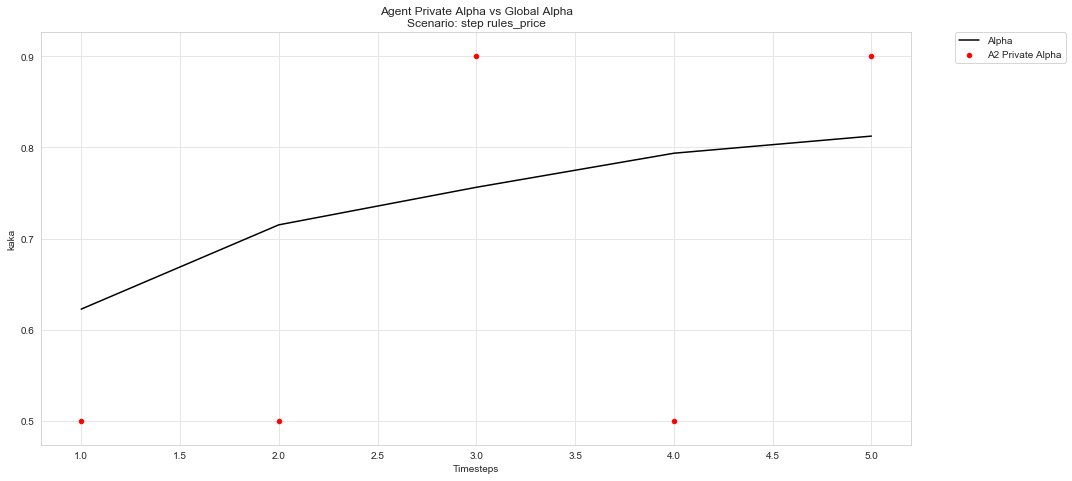

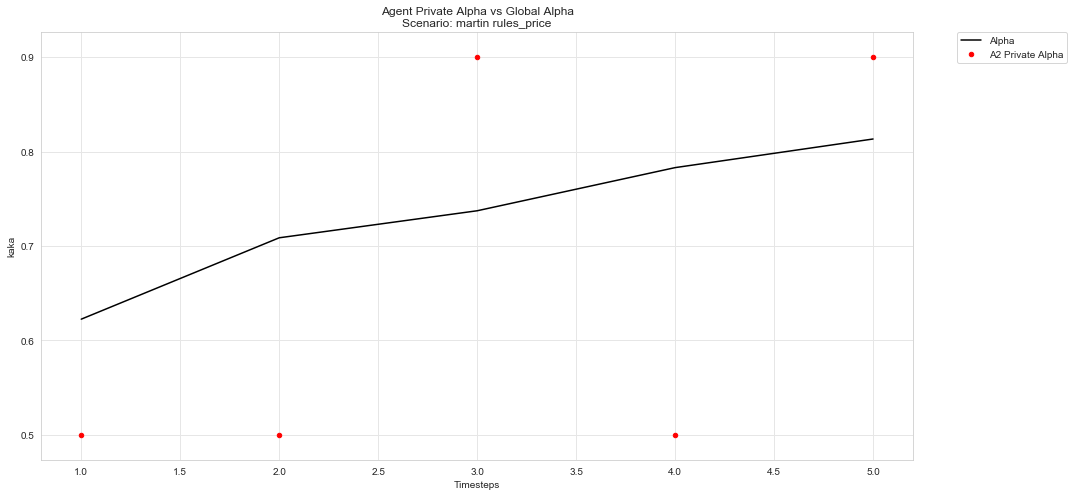

In [6]:
import sys

experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  


#         df = df.groupby('timestep').agg({'agents': ['min', 'mean', 'max']}).reset_index()
# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
       # print(len(chosen_agents_private_alphas))
        
        df['private_alpha'] = chosen_agents_private_alphas
      #  df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['chosen_agent']))
        
        df = df.groupby('timestep').mean().reset_index()
 
        # hack subtracting starting amount
#         df['alpha'] = df.alpha.diff()
        
#         df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()
    
#         df['agent_attest_1'] = np.array(df.agent_attest_1,dtype = float)
#         print(df['agent_attest_1'])
#         print(df['agent_attest_1'][10])
        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
#         df['agent_1_attestations_1'] = df['agent_1_attestations_1'][0]       
#         df.plot(x='timestep', y='agent_1_attestations_0', label='agent_1_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_0', label='agent_2_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_0', label='agent_3_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_0', label='agent_4_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_0', label='agent_5_attestations_0', ax=ax, legend=True)
#        df.plot(x='timestep', y='agent_1_private_alpha', label='A1 Private Alpha', ax=ax, legend=True, kind= 'scatter', color = 'red')
        df.plot(x='timestep', y='private_alpha', label='A2 Private Alpha', ax=ax, legend=True, kind= 'scatter', color='red')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])
        
#         ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')], supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

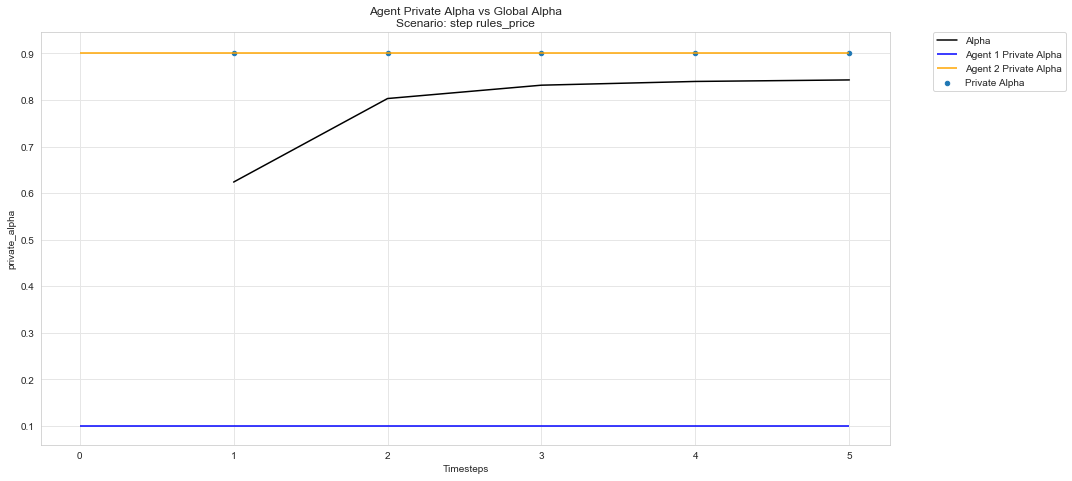

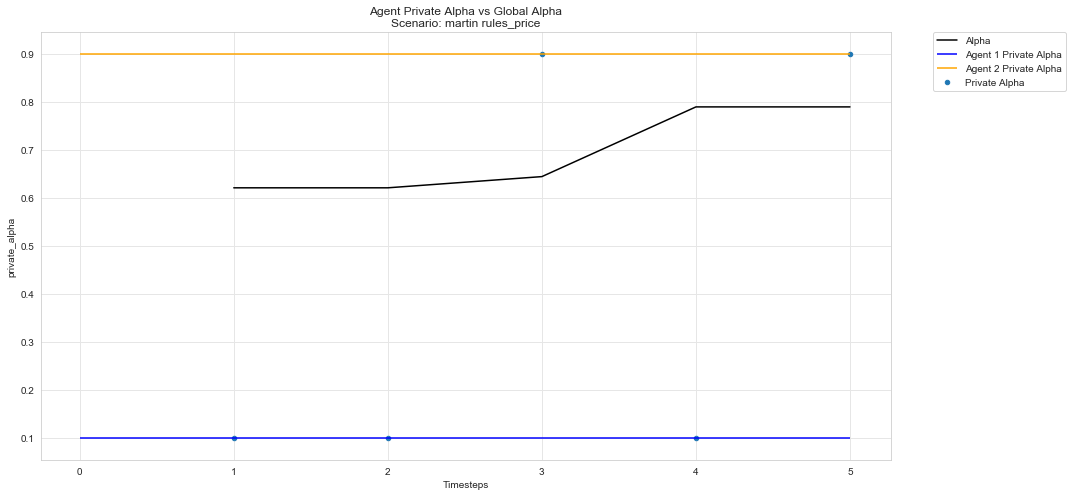

In [7]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
        df['private_alpha'] = chosen_agents_private_alphas
            
        df['agent_1_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][0]))
        df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][1]))
#         df['agent_3_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][2]))
#         df['agent_4_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][3]))
#         df['agent_5_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_1'] = df.agent_1_attestations_1.diff()
#         df['agent_2_attestations_1'] = df.agent_2_attestations_1.diff()
#         df['agent_3_attestations_1'] = df.agent_3_attestations_1.diff()
#         df['agent_4_attestations_1'] = df.agent_4_attestations_1.diff()
#         df['agent_5_attestations_1'] = df.agent_5_attestations_1.diff()
        
        
#         df['agent_1_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][0]))
#         df['agent_2_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][1]))
#         df['agent_3_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][2]))
#         df['agent_4_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][3]))
#         df['agent_5_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_0'] = - df.agent_1_attestations_0.diff()
#         df['agent_2_attestations_0'] = - df.agent_2_attestations_0.diff()
#         df['agent_3_attestations_0'] = - df.agent_3_attestations_0.diff()
#         df['agent_4_attestations_0'] = - df.agent_4_attestations_0.diff()
#         df['agent_5_attestations_0'] = - df.agent_5_attestations_0.diff()
        
        
        # hack subtracting starting amount
#         df['alpha'] = df.alpha.diff()
        
#         df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()
    
#         df['agent_attest_1'] = np.array(df.agent_attest_1,dtype = float)
#         print(df['agent_attest_1'])
#         print(df['agent_attest_1'][10])
        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
#         df['agent_1_attestations_1'] = df['agent_1_attestations_1'][0]
        
        plt.hlines(y= max(df['agent_1_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Alpha',  color = colors[0])
        plt.hlines(y= max(df['agent_2_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Alpha',  color = colors[1])
#         plt.hlines(y= max(df['agent_3_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 3 Private Alpha',  color = colors[2])
#         plt.hlines(y= max(df['agent_4_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 4 Private Alpha',  color = colors[3])
#         plt.hlines(y= max(df['agent_5_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 5 Private Alpha',  color = colors[4])

#         df.plot(x='timestep', y='agent_1_attestations_1', label='agent_1_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_1', label='agent_2_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_1', label='agent_3_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_1', label='agent_4_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_1', label='agent_5_attestations_1', ax=ax, legend=True)
        
#         df.plot(x='timestep', y='agent_1_attestations_0', label='agent_1_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_0', label='agent_2_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_0', label='agent_3_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_0', label='agent_4_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_0', label='agent_5_attestations_0', ax=ax, legend=True)
        df.plot(x='timestep', y='private_alpha', label='Private Alpha', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])

#         ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')], supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

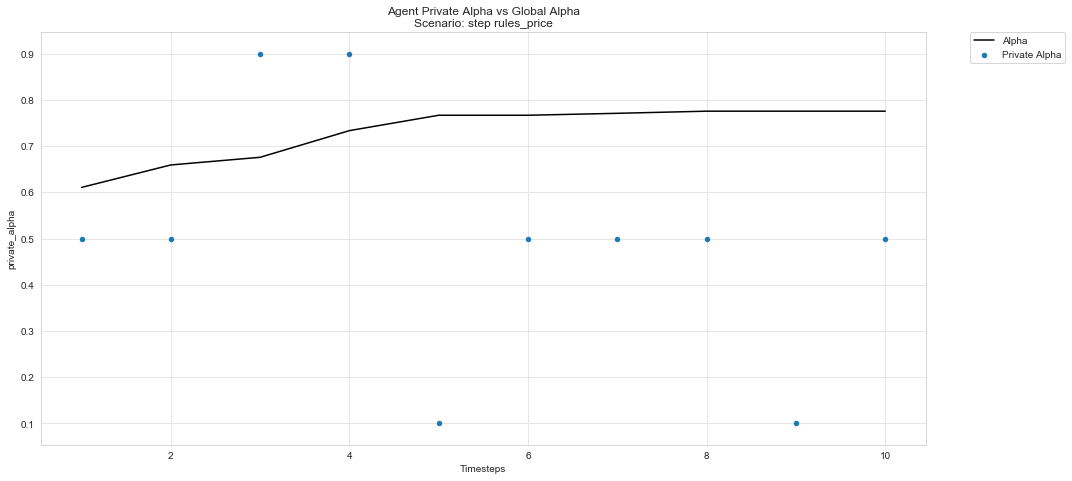

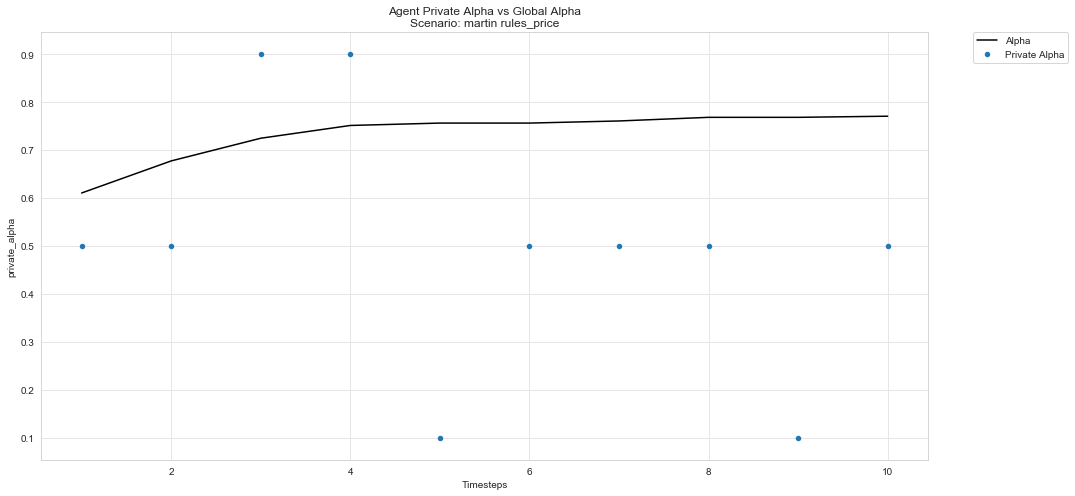

In [2]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  

#         df = df.groupby('timestep').agg({'agents': ['min', 'mean', 'max']}).reset_index()
# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
        df['private_alpha'] = chosen_agents_private_alphas
        
        df['agent_1_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][0]))
        df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][1]))
        
        df = df.groupby('timestep').mean().reset_index()
        
#         print(df)
#         df['agent_3_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][2]))
#         df['agent_4_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][3]))
#         df['agent_5_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_1'] = df.agent_1_attestations_1.diff()
#         df['agent_2_attestations_1'] = df.agent_2_attestations_1.diff()
#         df['agent_3_attestations_1'] = df.agent_3_attestations_1.diff()
#         df['agent_4_attestations_1'] = df.agent_4_attestations_1.diff()
#         df['agent_5_attestations_1'] = df.agent_5_attestations_1.diff()
        
     
#         df['agent_1_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][0]))
#         df['agent_2_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][1]))
#         df['agent_3_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][2]))
#         df['agent_4_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][3]))
#         df['agent_5_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_0'] = - df.agent_1_attestations_0.diff()
#         df['agent_2_attestations_0'] = - df.agent_2_attestations_0.diff()
#         df['agent_3_attestations_0'] = - df.agent_3_attestations_0.diff()
#         df['agent_4_attestations_0'] = - df.agent_4_attestations_0.diff()
#         df['agent_5_attestations_0'] = - df.agent_5_attestations_0.diff()
        
        
        # hack subtracting starting amount
#         df['alpha'] = df.alpha.diff()
        
#         df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()
    
#         df['agent_attest_1'] = np.array(df.agent_attest_1,dtype = float)
#         print(df['agent_attest_1'])
#         print(df['agent_attest_1'][10])
        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
#         df['agent_1_attestations_1'] = df['agent_1_attestations_1'][0]
        
#         plt.hlines(y= max(df['agent_1_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Alpha',  color = colors[0])
#         plt.hlines(y= max(df['agent_2_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Alpha',  color = colors[1])
#         plt.hlines(y= max(df['agent_3_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 3 Private Alpha',  color = colors[2])
#         plt.hlines(y= max(df['agent_4_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 4 Private Alpha',  color = colors[3])
#         plt.hlines(y= max(df['agent_5_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 5 Private Alpha',  color = colors[4])

#         df.plot(x='timestep', y='agent_1_attestations_1', label='agent_1_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_1', label='agent_2_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_1', label='agent_3_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_1', label='agent_4_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_1', label='agent_5_attestations_1', ax=ax, legend=True)
        
#         df.plot(x='timestep', y='agent_1_attestations_0', label='agent_1_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_0', label='agent_2_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_0', label='agent_3_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_0', label='agent_4_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_0', label='agent_5_attestations_0', ax=ax, legend=True)
        df.plot(x='timestep', y='private_alpha', label='Private Alpha', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])

#         ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')], supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

In [19]:
experiments.dataset[0].agents[0].agent_private_price

0     0.2
1    20.0
Name: agent_private_price, dtype: float64

In [2]:
print(experiments.dataset[0].spot_price)
plt.plot(experiments.dataset[0].spot_price)

NameError: name 'experiments' is not defined